# 경사하강법(순한맛)

## 미분이 뭔가요?
- 미분(differentiation)은 `변수의 움직임에 따른 함수값의 변화를 측정하기 위한 도구`로 최적화에서 제일 많이 사용하는 기법입니다.
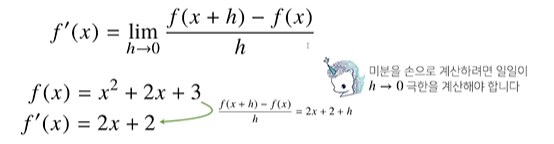


- 최근엔 미분을 손으로 직접 계산하는 대신 컴퓨터가 계산해줄 수 있습니다.
    - sympy.diff

In [2]:
import sympy as sym
from sympy.abc import x

sym.diff(sym.poly(x**2 + 2*x + 3), x)

Poly(2*x + 2, x, domain='ZZ')

## 미분을 그림으로 이해해보자
- 미분은 함수 $f$의 주어진 점 $(x,f(x))$에서의 `접선의 기울기`를 구한다.
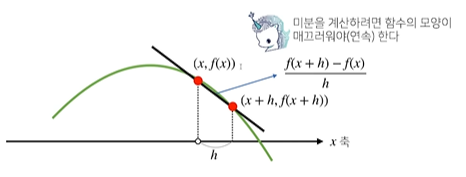
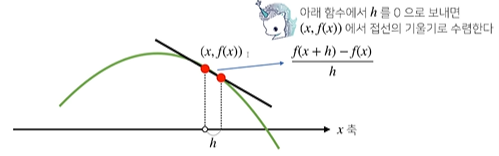

## 미분을 어디에 쓸까?
- 한 점에서 접선의 기울기를 알면 어느 방향으로 점을 움직여야 함수값이 `증가`하는지/`감소`하는지 알 수 있다.
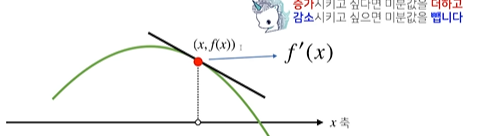
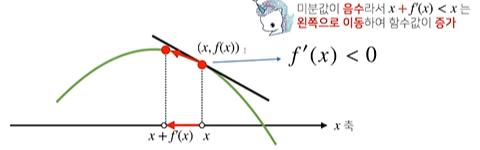
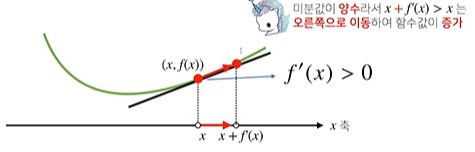
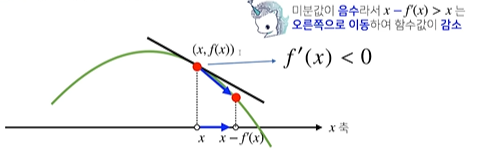
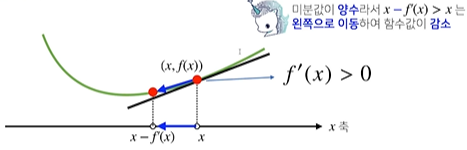

- 미분값을 더하면 `경사상승법(gradient ascent)`이라 하며 함수의 `극대값`의 위치를 구할 때 사용한다.
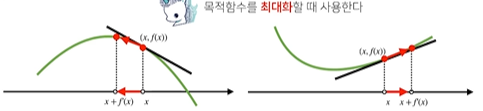

- 미분값을 빼면 `경사하강법(gradient descent)`이라 하며 함수의 `극소값`의 위치를 구할 때 사용한다.
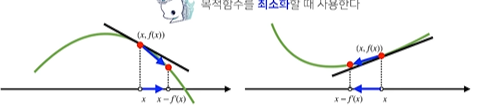

- `경사상승`/`경사하강` 방법은 극값에 도달하면 움직임을 멈춘다.
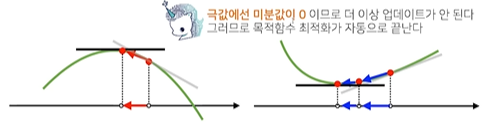

## 경사하강법: 알고리즘

```

Input: gradient, init, lr, eps,
Ouput: var
----------------------------------
# gradient: 미분을 계산하는 함수
# init: 시작점, lr: 학습률, eps: 알고리즘 종료조건

var = init
grad = gradient(var)
while(abs(grad) > eps):  # 컴퓨터로 계산할 때 미분이 정확히 0이 되는 것은 불가능 -> eps보다 작을 때 종료
    var = var - lr * grad
    grad = gradient(var)

```

In [ ]:
# 변수가 1개인 경우

In [ ]:
# 함수가 f(x) = x^2 + 2x + 3 일때 경사하강법으로 최소점을 찾는 코드

In [5]:
import numpy as np

In [6]:
def func(val):
    fun=sym.poly(x**2 + x*2 + 3)
    return fun.subs(x, val), fun

def func_gradient(fun, val):
    _, function = fun(val)
    diff=sym.diff(function, x)
    return diff.subs(x, val), diff

def gradient_descent(fun, init_point, lr_rate=1e-2,epsilon=1e-5):
    cnt=0
    val=init_point
    diff, _ = func_gradient(fun, init_point)
    while np.abs(diff) > epsilon:
        val = val - lr_rate*diff
        diff, _ = func_gradient(fun, val)
        cnt+=1
        
    print('함수: {}, 연산횟수: {}, 최소점: ({}, {})'.format(fun(val)[1], cnt, val, fun(val)[0]))
    
gradient_descent(fun=func, init_point=np.random.uniform(-2, 2))

함수: Poly(x**2 + 2*x + 3, x, domain='ZZ'), 연산횟수: 515, 최소점: (-0.999995009851913, 2.00000000002490)


## 변수가 벡터이면요?
- 미분(differentiation)은 `변수의 움직임에 따른 함수값의 변화를 측정하기 위한 도구`로 치적화에서 제일 많이 사용하는 기법입니다.
- 벡터가 입력인 다변수 함수의 경우 `편미분(partial differentitation)`을 사용한다.
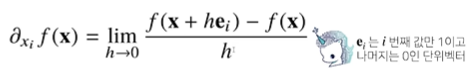
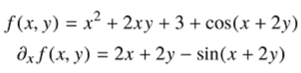

In [7]:
import sympy as sym
from sympy.abc import x, y

sym.diff(sym.poly(x**2 + 2*x*y + 3) + sym.cos(x + 2*y), x)

C:\Users\user\AppData\Local\Temp\ipykernel_14976\1061930478.py:4: SymPyDeprecationWarning: 

Mixing Poly with non-polynomial expressions in binary
operations is deprecated. Either explicitly convert
the non-Poly operand to a Poly with as_poly() or
convert the Poly to an Expr with as_expr().

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-poly-nonpoly-binary-operations
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  sym.diff(sym.poly(x**2 + 2*x*y + 3) + sym.cos(x + 2*y), x)


2*x + 2*y - sin(x + 2*y)

- 각 변수 별로 편미분을 계산한 그레디언트(gradient) 벡터를 이용하여 경사하강/경사상승법에 사용할 수 있다.
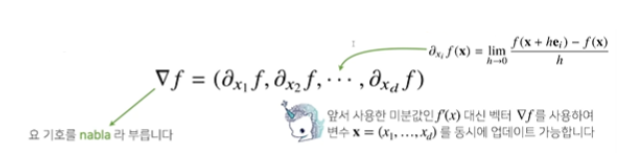

## 그레디언트 벡터가 뭐에요?
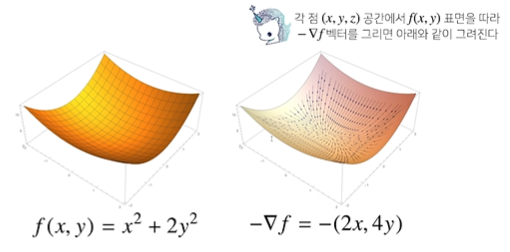
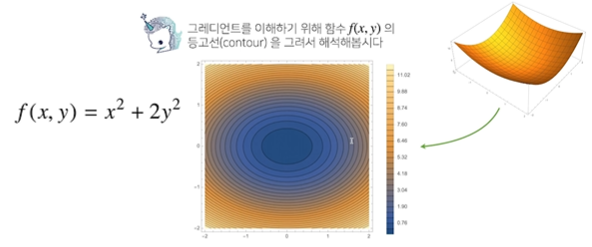
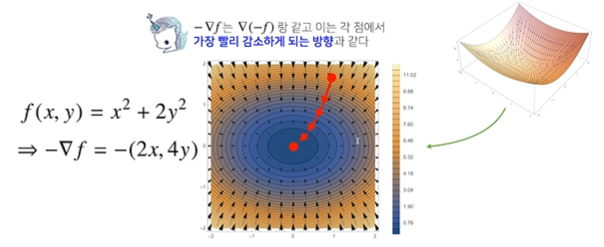

## 경사하강법: 알고리즘

```

Input: gradient, init, lr, eps,
Ouput: var
----------------------------------
# gradient: 그레디언트 을 계산하는 함수
# init: 시작점, lr: 학습률, eps: 알고리즘 종료조건

var = init
grad = gradient(var)
while(norm(grad) > eps):  # 벡터는 절댓값 대신 노름(norm)을 계산해서 종료조건 설정
    var = var - lr * grad
    grad = gradient(var)

```

In [ ]:
# 함수가 f(x) = x^2 + 2*y^2 일때 경사하강법으로 최소점을 찾는 코드

In [13]:
def eval_(fun, val):
    val_x, val_y = val
    fun_eval = fun.subs(x, val_x).subs(y, val_y)

def func_multi(val):
    x_, y_ = val
    func=sym.poly(x**2 + 2*y**2)
    return eval_(func, [x_, y_]), func

def func_gradient(fun, val):
    x_, y_ = val
    _, function = fun(val)
    diff_x=sym.diff(function, x)
    diff_y=sym.diff(function, y)
    grad_vec=np.array([eval_(diff_x, [x_, y_]), eval_(diff_y, [x_, y_])], dtype=float)
    return grad_vec, [diff_x, diff_y]

def gradient_descent(fun, init_point, lr_rate=1e-2,epsilon=1e-5):
    cnt=0
    val=init_point
    diff, _ = func_gradient(fun, val)
    while np.linalg.norm(diff) > epsilon:
        val = val - lr_rate*diff
        diff, _ = func_gradient(fun, val)
        cnt+=1
        
    print('함수: {}, 연산횟수: {}, 최소점: ({}, {})'.format(fun(val)[1], cnt, val, fun(val)[0]))

pt=[np.random.uniform(-2,2), np.random.uniform(-2,2)]
gradient_descent(fun=func_multi, init_point=pt)

함수: Poly(x**2 + 2*y**2, x, y, domain='ZZ'), 연산횟수: 0, 최소점: ([1.20930262207141, 1.5490231034960065], None)
